In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"data.xlsx - Sheet1.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

#### Dropped Unnamed column as it is of no use

In [4]:
df.shape

(3998, 39)

In [5]:
# Drop Unnamed Column from the dataframe
df=df.iloc[:,1:]

In [6]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
# Finding categorical, numerical, and other data type columns
categorical_cols = []
numerical_cols = []
other_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numerical_cols.append(col)
    else:
        other_cols.append(col)

print("Categorical columns:", categorical_cols)
print()
print("Numerical columns:", numerical_cols)
print()
print("Other data type columns:", other_cols)

Categorical columns: ['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

Numerical columns: ['ID', 'Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

Other data type columns: []


In [10]:
np.round(df.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,...,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,...,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,...,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,...,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


#### We see that the dates are in the format of object,so lets change them to dates and lets change the present in DOL to today's date,so the columns will have proper dates.

In [11]:
df["DOJ"]=pd.to_datetime(df["DOJ"]).dt.date
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df["DOL"]=pd.to_datetime(df["DOL"]).dt.date
df["Year"]=pd.to_datetime(df["DOL"]).dt.year
df["Month"]=pd.to_datetime(df["DOL"]).dt.month
df["Day"]=pd.to_datetime(df["DOL"]).dt.day
df["DOB"]=pd.to_datetime(df["DOB"]).dt.date

####  In Designation,We See one garbage value "get". So we dont know what proffesion is that or whatever. So we will replace it with mode.

In [12]:
df[df["Designation"]=="get"]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1
332,597966,180000.0,2013-08-01,2014-03-01,get,-1,m,1990-08-02,91.80,cbse,...,-1,-1,-0.1590,0.8784,0.3174,0.27270,0.4805,2014,3,1
350,38162,340000.0,2010-07-01,2011-05-01,get,Faridabad,m,1988-08-13,67.67,up board,...,-1,-1,-1.9629,-1.0593,-0.7794,-0.17270,-0.1295,2011,5,1
1717,330551,145000.0,2012-10-01,2013-01-01,get,Hyderabad,m,1991-07-29,80.00,ssc,...,-1,-1,1.5533,1.7488,1.6880,-1.14220,0.1864,2013,1,1
1897,1064862,175000.0,2014-05-01,2024-02-23,get,Hyderabad,m,1991-02-04,87.00,state board,...,-1,-1,1.5644,-1.1196,0.4711,1.16010,0.4805,2024,2,23
2140,796296,600000.0,2014-06-01,2024-02-23,get,Indore,m,1992-01-05,91.20,cbse,...,-1,-1,-1.4517,0.0459,-1.6807,0.90660,0.0973,2024,2,23
2318,1094242,220000.0,2014-07-01,2024-02-23,get,Lucknow,m,1992-02-06,80.20,cbse,...,-1,-1,1.4208,1.0449,-0.4511,0.01920,0.6721,2024,2,23
2443,1259589,110000.0,2014-10-01,2015-04-01,get,kharagpur,m,1993-03-18,80.00,icse,...,-1,-1,-0.4463,-0.9531,0.1637,0.01920,-2.0105,2015,4,1
2666,110817,200000.0,2010-03-01,2011-03-01,get,Hyderabad,m,1989-05-15,80.00,ssc,...,-1,-1,-0.4173,0.3448,0.3817,-0.64280,0.9763,2011,3,1
2757,1083682,350000.0,2015-01-01,2024-02-23,get,Nashik,m,1994-01-17,90.60,cbse,...,-1,-1,0.1282,0.2124,-1.2196,-0.99500,-0.2859,2024,2,23


In [13]:
df["Designation"].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [14]:
mode_val = df['Designation'].mode()[0]
df['Designation'] = df['Designation'].replace('get', mode_val)

In [15]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2024,2,23
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,2024,2,23
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,2024,2,23
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2024,2,23
4,343523,200000.0,2014-03-01,2015-03-01,software engineer,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,2012,10,1
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,2013,7,1
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2024,2,23
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2015,1,1


### replaced the get in Designation column with the mode value

In [16]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [17]:
df['JobCity'].nunique()

339

In [18]:
mode_val1 = df['JobCity'].mode()[0]
df['JobCity'] = df['JobCity'].replace('-1', mode_val1)

In [19]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', 'Bhop

In [20]:
df['JobCity'].value_counts()

Bangalore           1088
Noida                368
Hyderabad            335
Pune                 290
Chennai              272
                    ... 
Asansol                1
Tirunelvelli           1
Ernakulam              1
Nanded                 1
Asifabadbanglore       1
Name: JobCity, Length: 338, dtype: int64

In [21]:
df["12graduation"].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [22]:
df["GraduationYear"].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [23]:
df.drop(df[df["GraduationYear"] == 0].index,inplace=True)
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,2024,2,23
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,2024,2,23
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,2024,2,23
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2024,2,23
4,343523,200000.0,2014-03-01,2015-03-01,software engineer,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,2012,10,1
3994,752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,2013,7,1
3995,355888,320000.0,2013-07-01,2024-02-23,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2024,2,23
3996,947111,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2015,1,1


In [24]:
df["GraduationYear"].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

### The value -1 got replaced with city Bangalore

# UNIVARIATE ANALYSIS

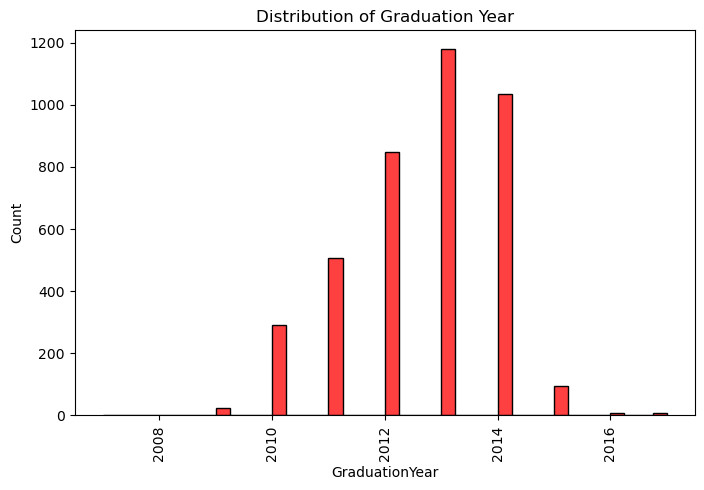

In [26]:
# Histogram and PDFs of GraduationYear
plt.figure(figsize=(8, 5))
plt.xticks(rotation=90)
sns.histplot(df["GraduationYear"], color="red")
plt.title("Distribution of Graduation Year")
plt.show()

## This histogram reveals that the majority of employees are completed their GraduationYear in the year 2013.

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

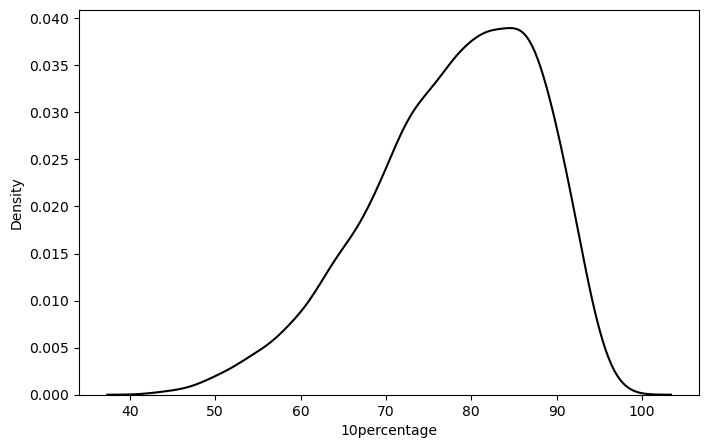

In [27]:
# Kdeplot of 10percentage
plt.figure(figsize=(8, 5))
sns.kdeplot(df["10percentage"], color="k")

### This KDE plot illustrates the density of employees' 10th percentage, revealing a left-skewed distribution where the majority of employees have around 85% in their 10th-grade exams.

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

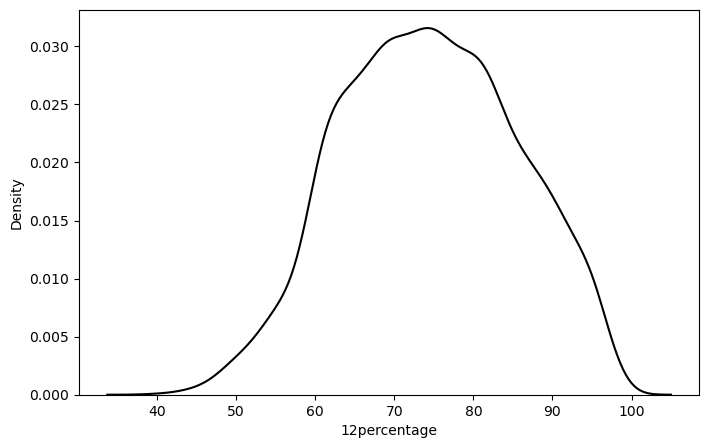

In [28]:
# Kdeplot of 12percentage
plt.figure(figsize=(8, 5))
sns.kdeplot(df["12percentage"], color="k")

### This KDE plot shows the density distribution of employees' 12th-grade percentages, resembling a normal distribution with the majority falling between 70% to 80%, indicating a common range for most employees' 12th-grade scores.

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

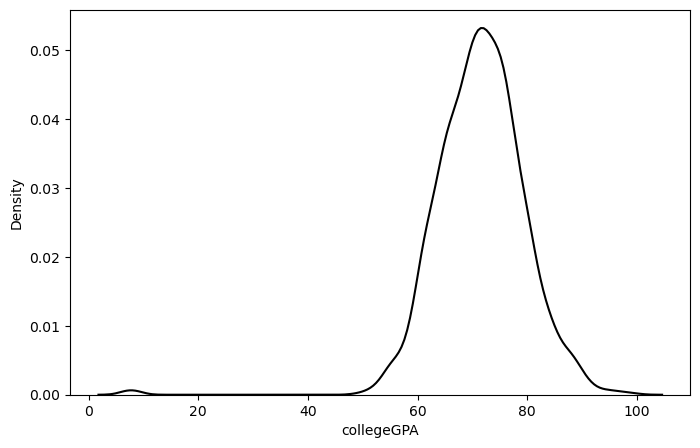

In [29]:
# Kde plot of collegeGPA
plt.figure(figsize=(8, 5))
sns.kdeplot(df["collegeGPA"], color="k")

### This KDE plot illustrates the density distribution of employees' college GPA, resembling a normal distribution with the majority falling between 65 to 75, suggesting a common range for most employees' college GPAs.

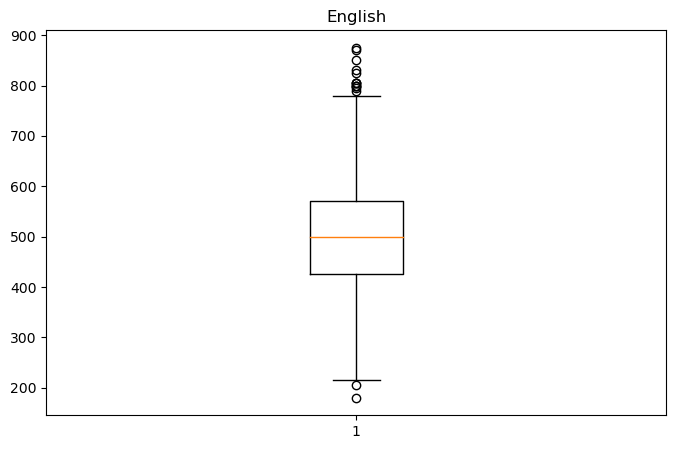

In [30]:
# Box plot of English column
plt.figure(figsize=(8, 5))
plt.boxplot(df["English"])  # sns.boxplot(data["English"])
plt.title("English")
plt.show()

### This box plot shows the distribution of marks in the English column for each employee, indicating the presence of numerous outliers, both at the high and low extremes, suggesting substantial variability in the English scores among employees.

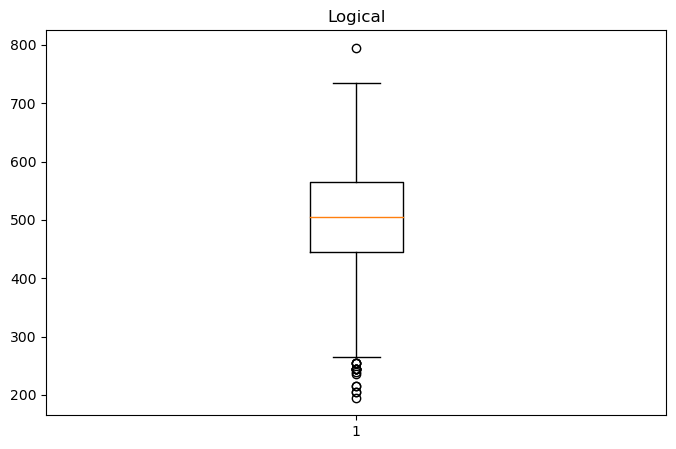

In [31]:
# Box plot of Logical column
plt.figure(figsize=(8, 5))
plt.boxplot(df["Logical"])  
plt.title("Logical")
plt.show()

### This box plot illustrates the distribution of marks in the Logical column for each employee, revealing the presence of numerous outliers, both at the high and low extremes, indicating considerable variability in Logical scores among employees.

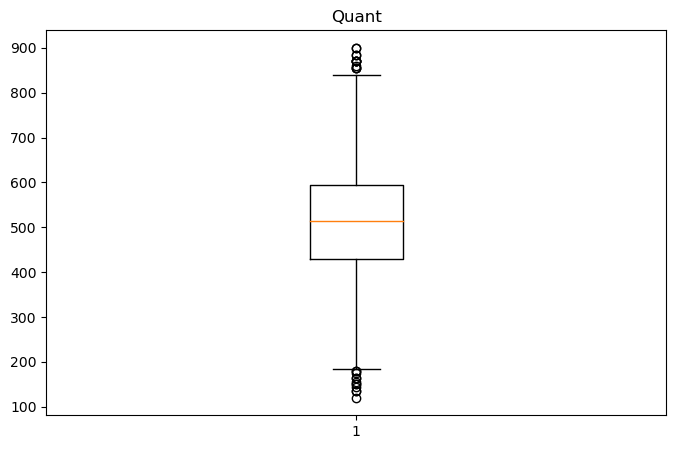

In [32]:
# Box plot of Quant column
plt.figure(figsize=(8, 5))
plt.boxplot(df["Quant"]) 
plt.title("Quant")
plt.show()

### This Box plot tells abouts the Quant column it shows the marks of each employee and this column have the many outliers like high extream outliers and low extream outliers

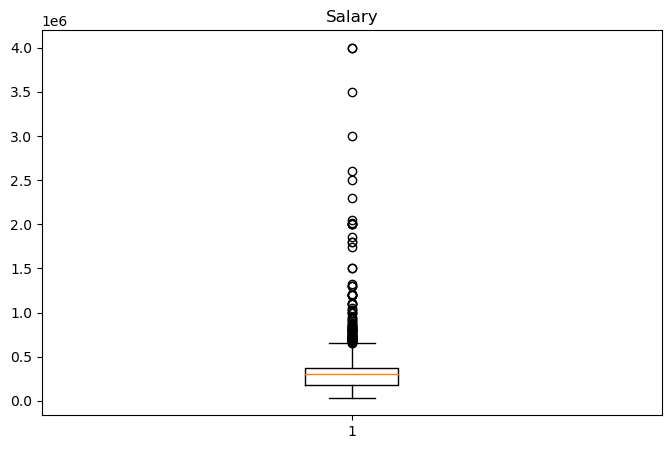

In [33]:
# Box plot of Salary column
plt.figure(figsize=(8, 5))
plt.boxplot(df["Salary"]) 
plt.title("Salary")
plt.show()

### This Box plot tells abouts the Salary coloumn it shows the marks of each employee and this colomn have high extream outliers.The presence of outliers indicates that there are individuals with exceptionally high or low salaries compared to the rest of the group.

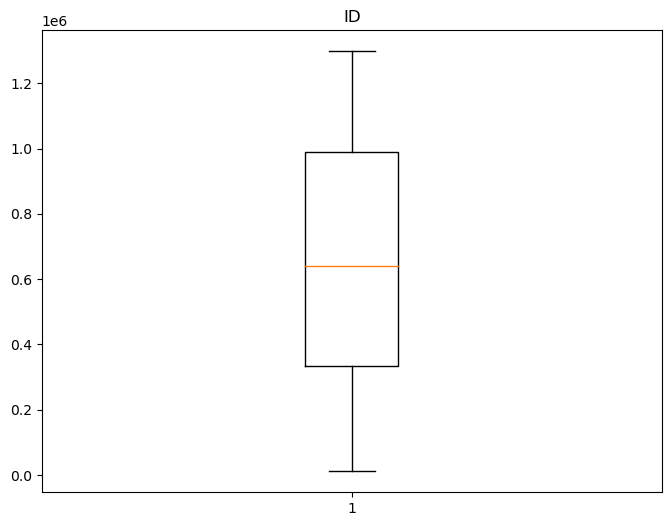

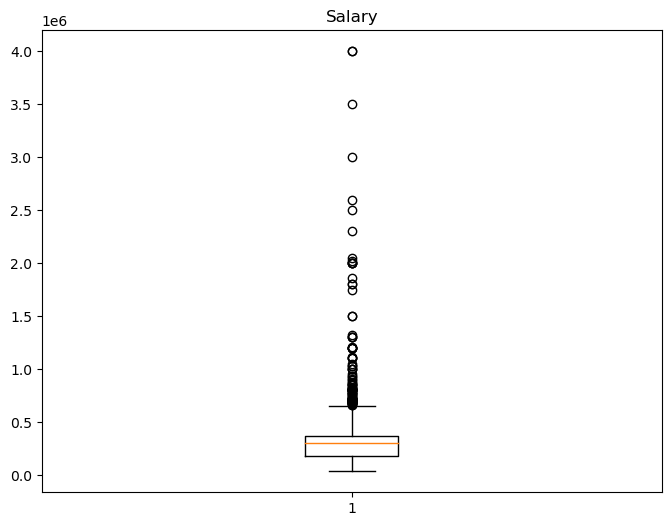

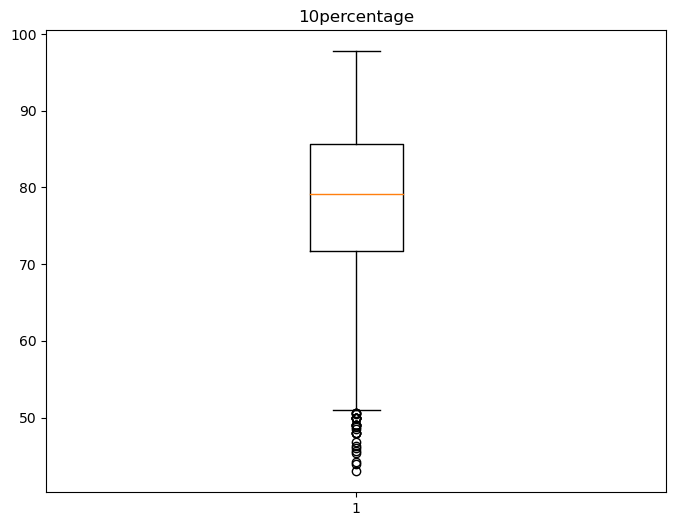

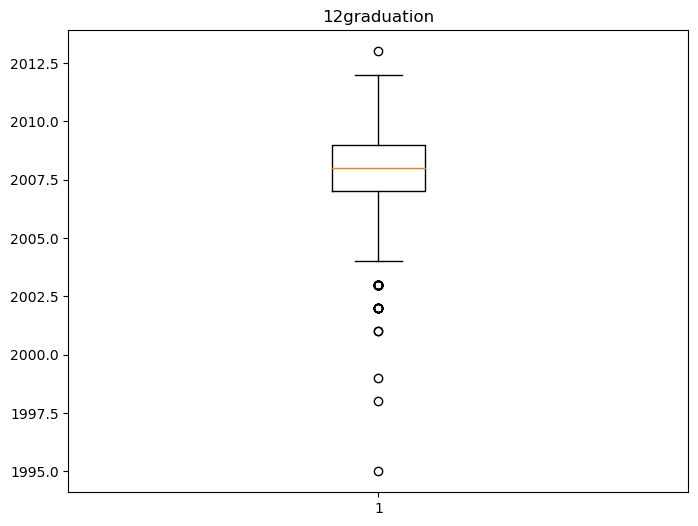

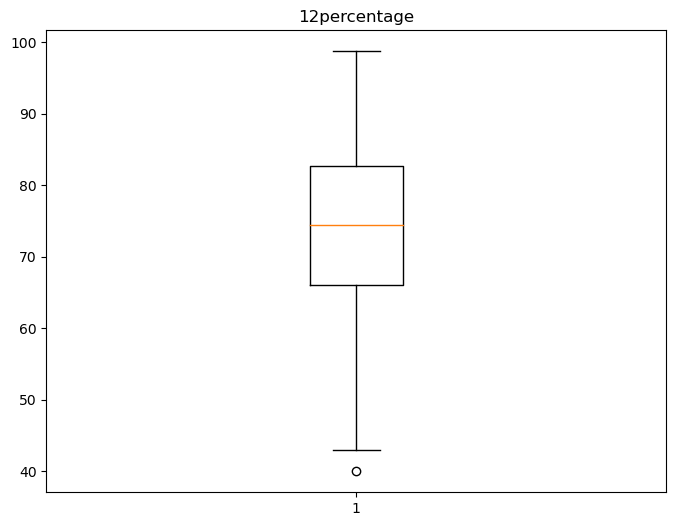

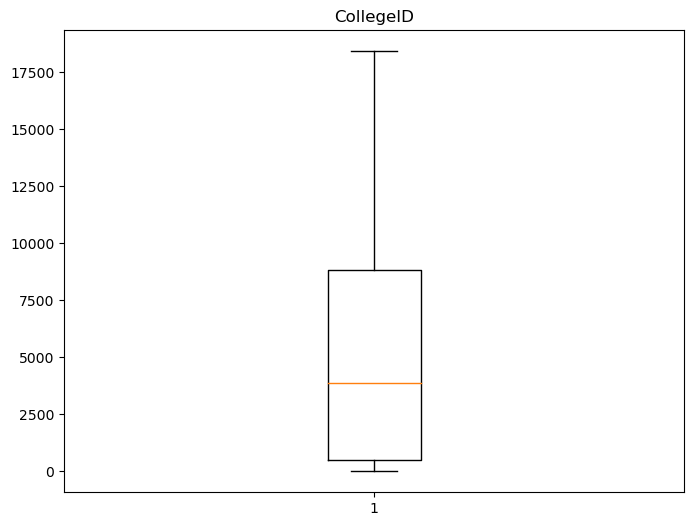

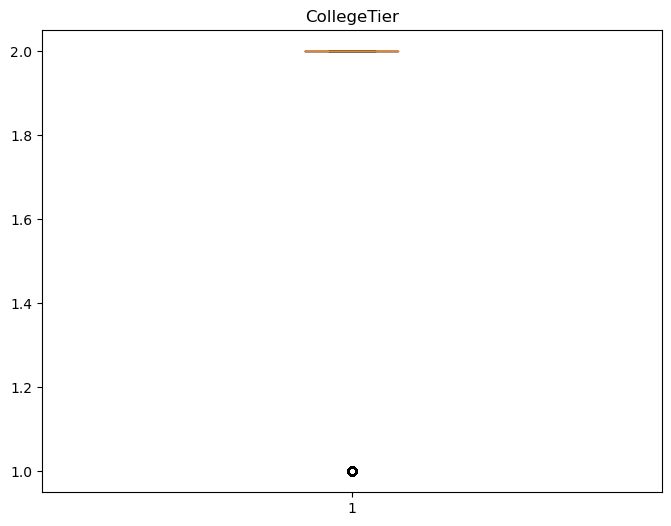

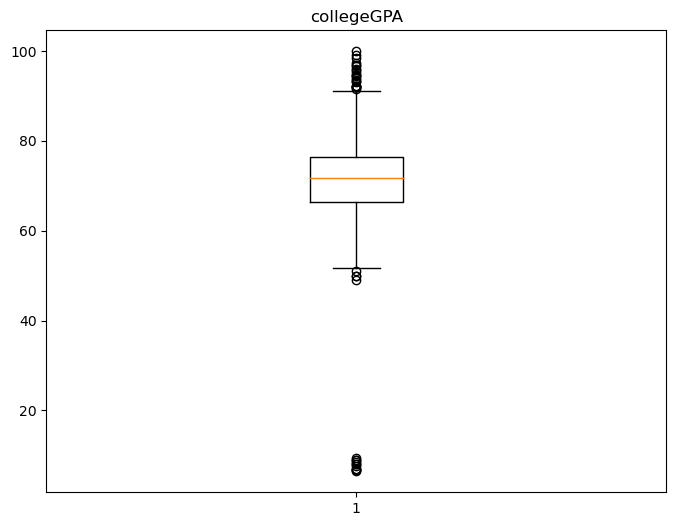

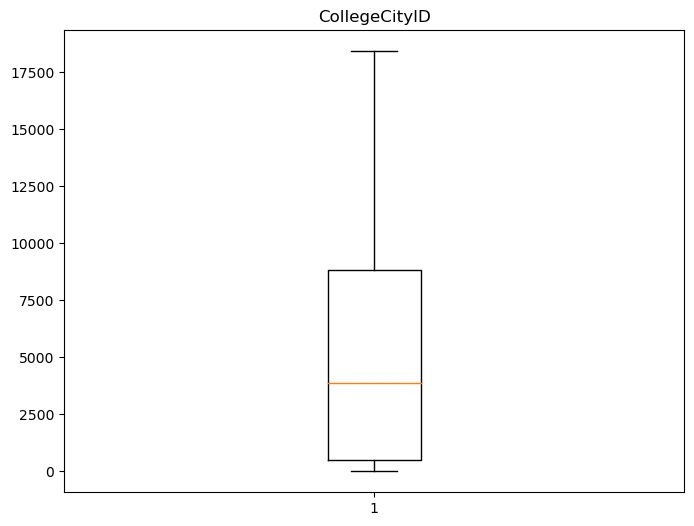

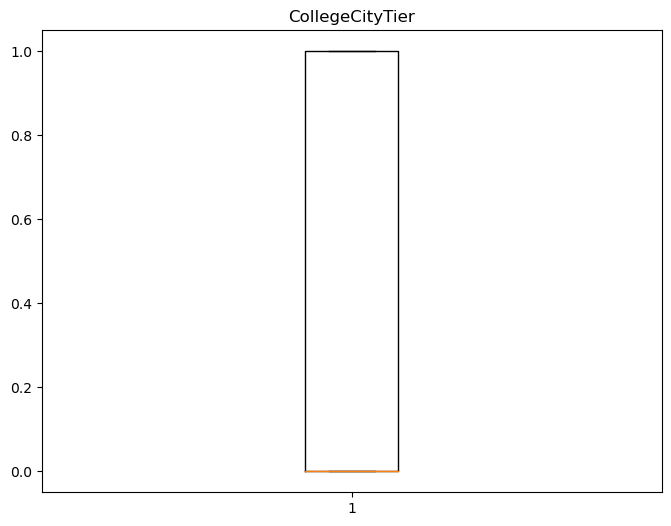

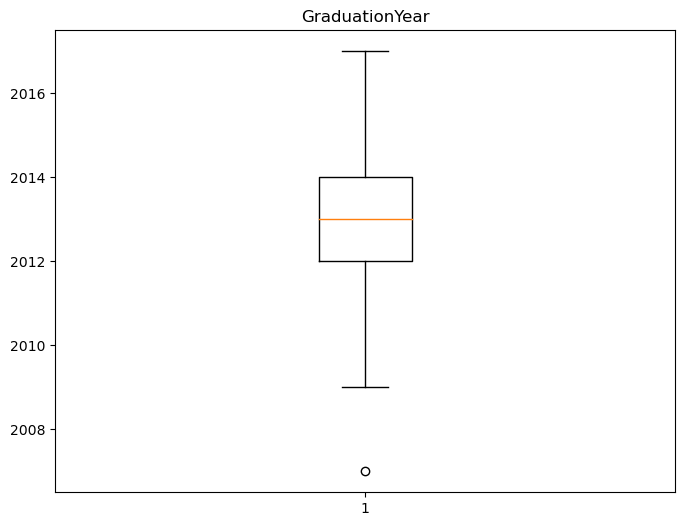

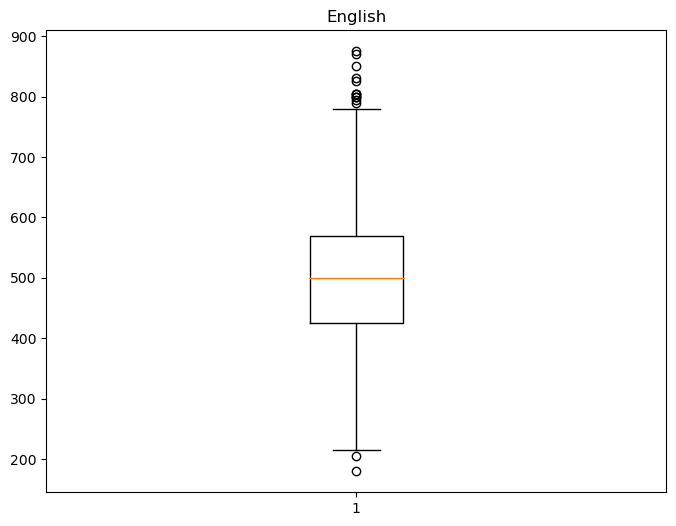

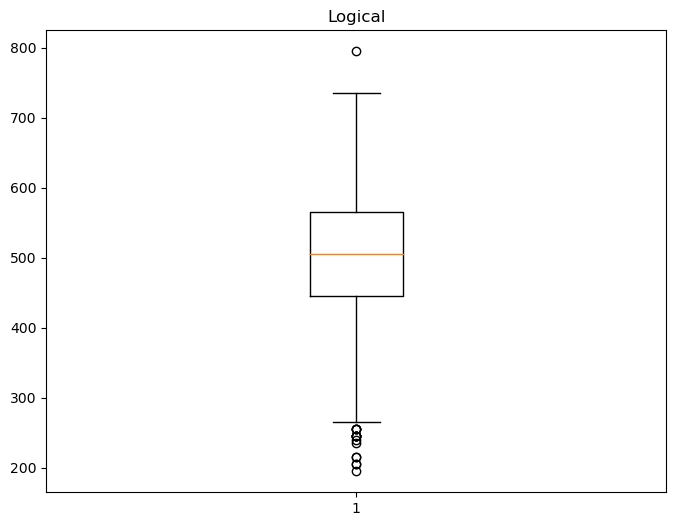

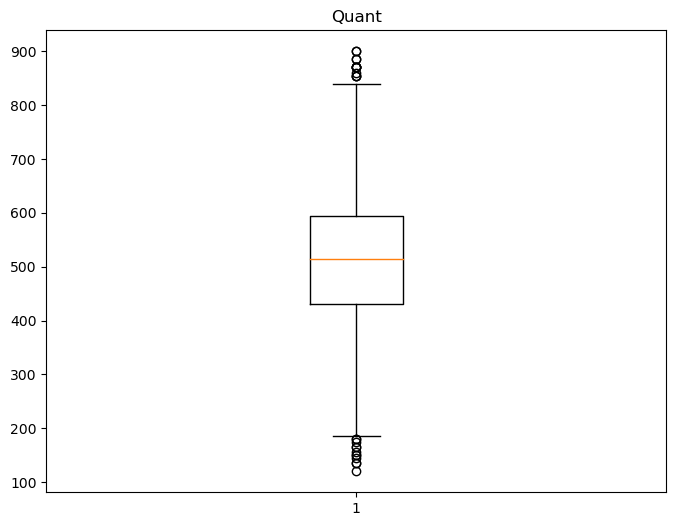

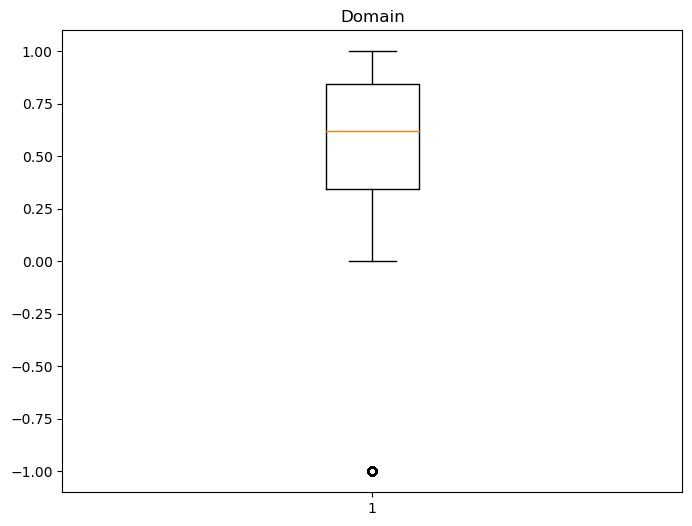

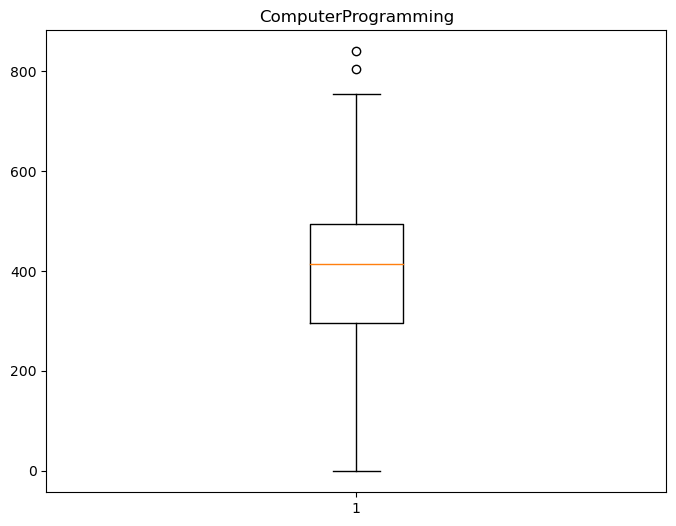

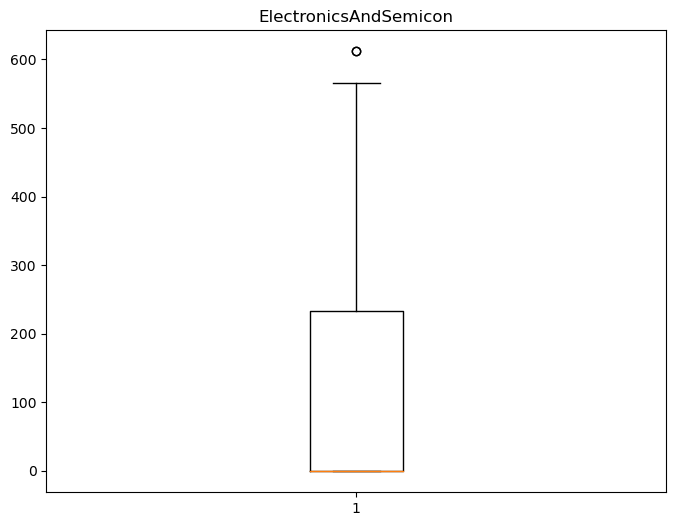

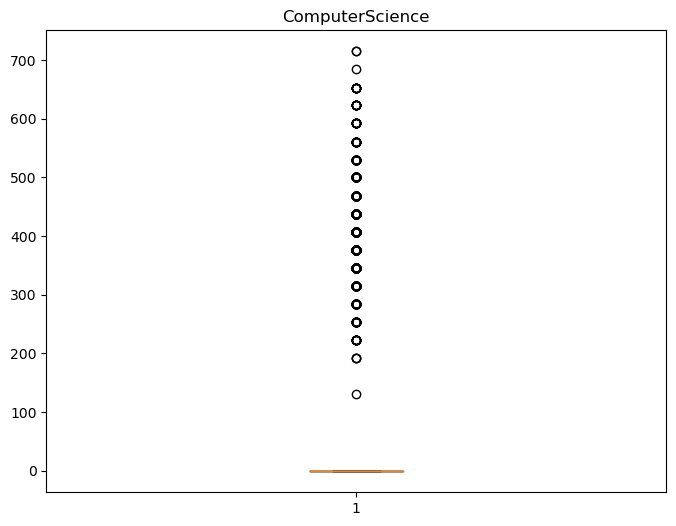

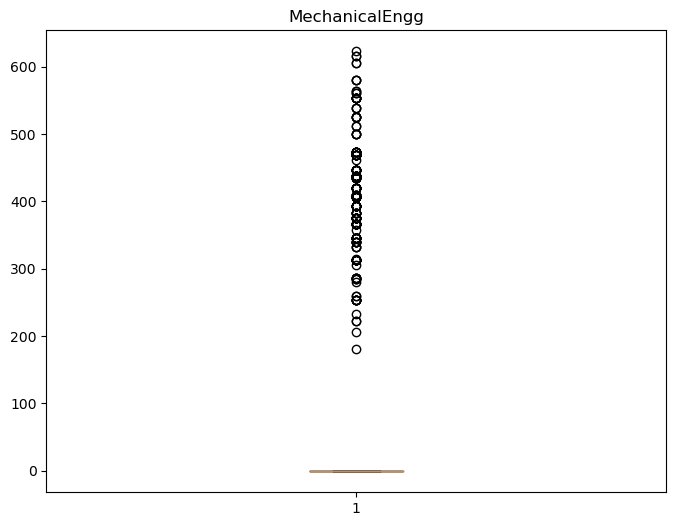

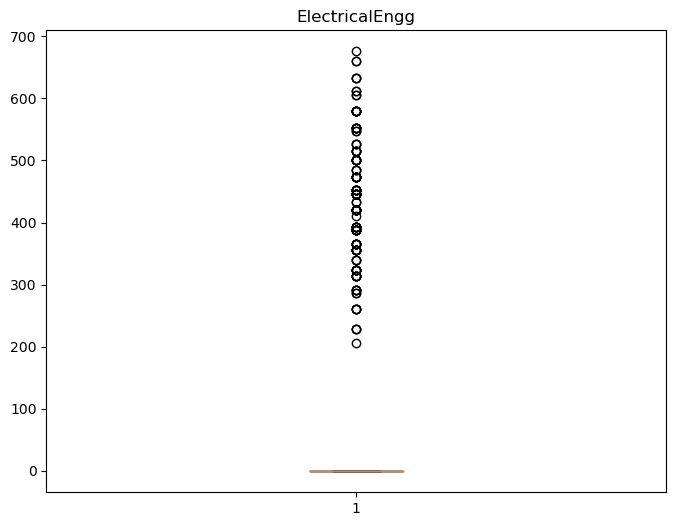

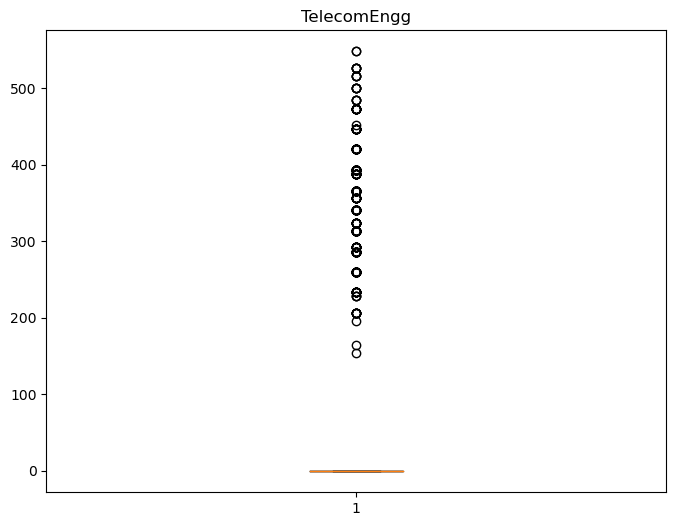

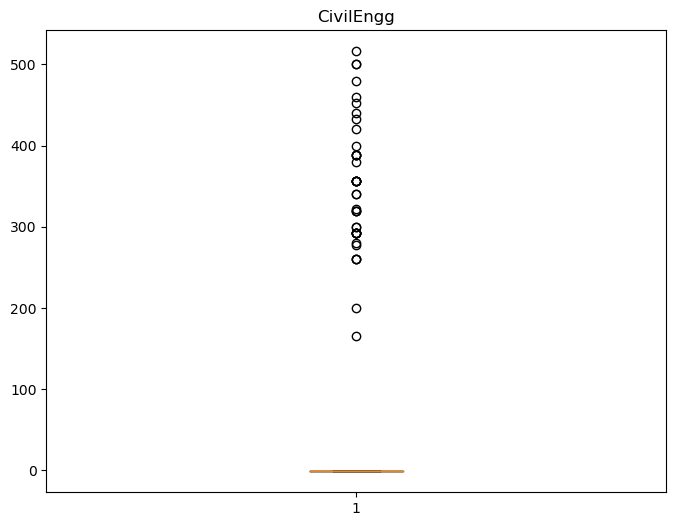

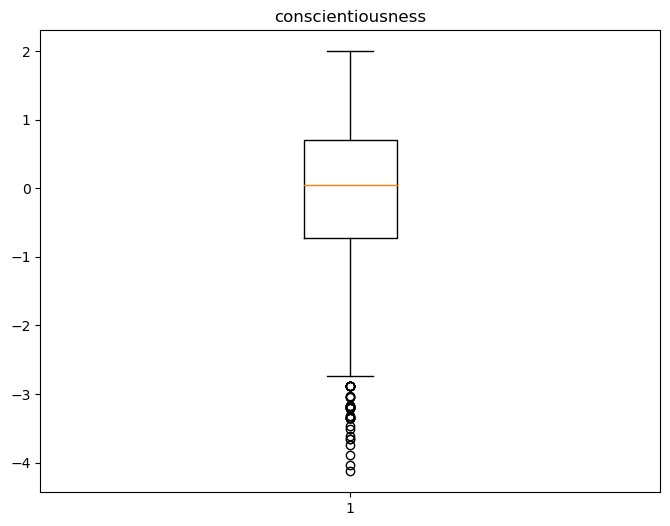

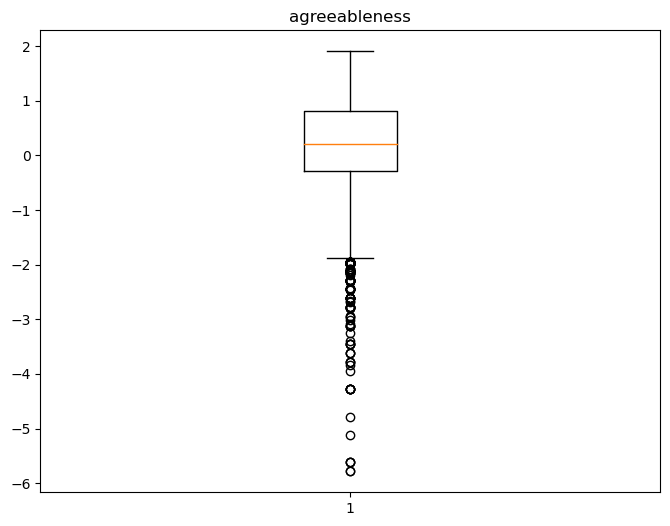

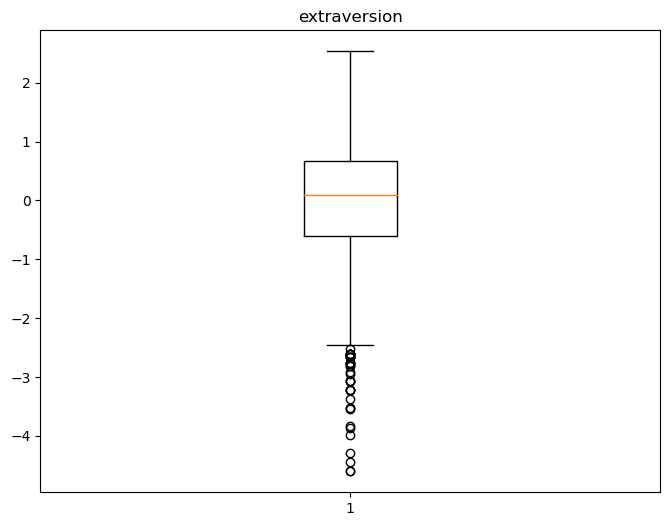

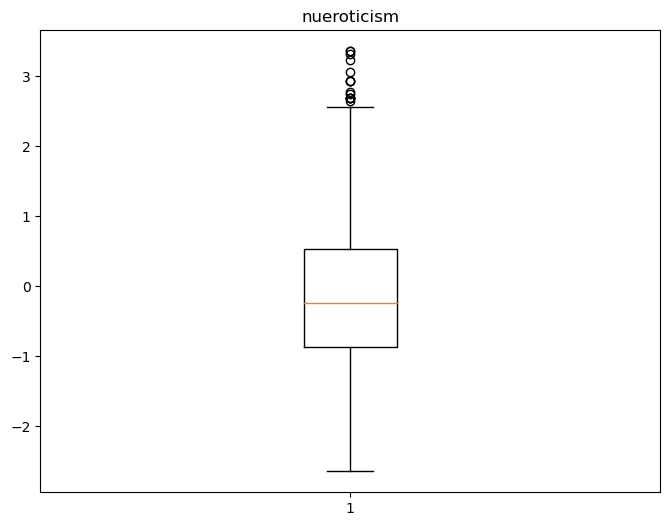

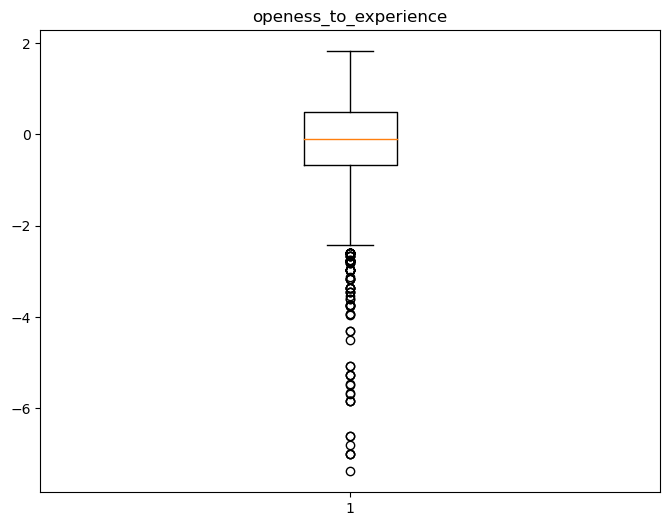

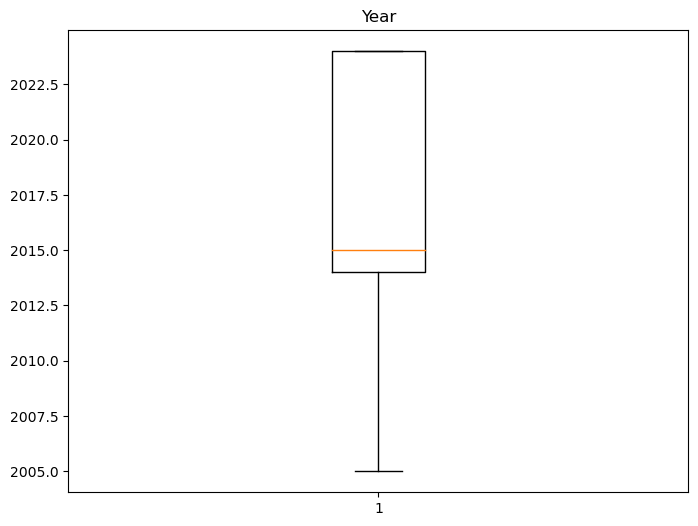

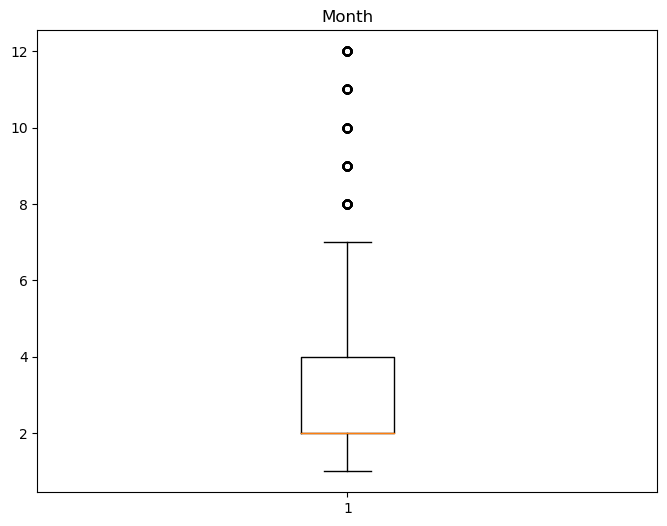

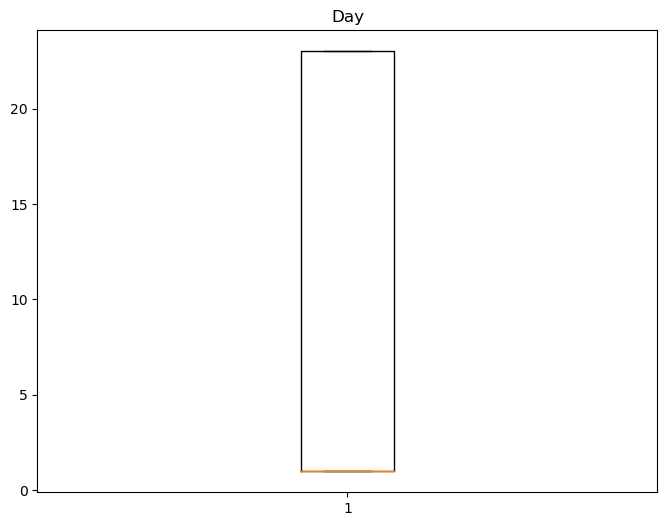

In [34]:
## Boxplot of all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# After performing the box plot for each column, it can be observed that:

Columns with Low and High Extremes Outliers:

----->12graduation: This column exhibits both low and high extremes outliers.

----->CollegeGPA: Similar to 12graduation, it displays outliers at both ends of the distribution.

----->English:There are outliers present at both high and low extremes.

----->Logical: This column also shows outliers at both ends of the distribution.

----->Quant: Similar to Logical, it has outliers at both high and low extremes.

Columns with No Outliers:

----->ID: There are no outliers observed in this column.

----->CollegeID: Similarly, this column does not contain any outliers.

Columns with High Extremes Outliers Only:

----->Salary: Outliers are predominantly located at the high extreme end, indicating significantly higher salaries compared to the majority of employees.

Columns with Low Extremes Outliers Only:

----->10percentage: Outliers are present only at the low extreme end.

----->12percentage: Similar to 10percentage, outliers are located at the low extreme.

----->GraduationYear: This column exhibits outliers solely at the low extreme.

These observations provide insights into the distribution and presence of outliers across different columns in the dataset.

In [35]:
top_10=df['JobCity'].value_counts().index[0:11].tolist()

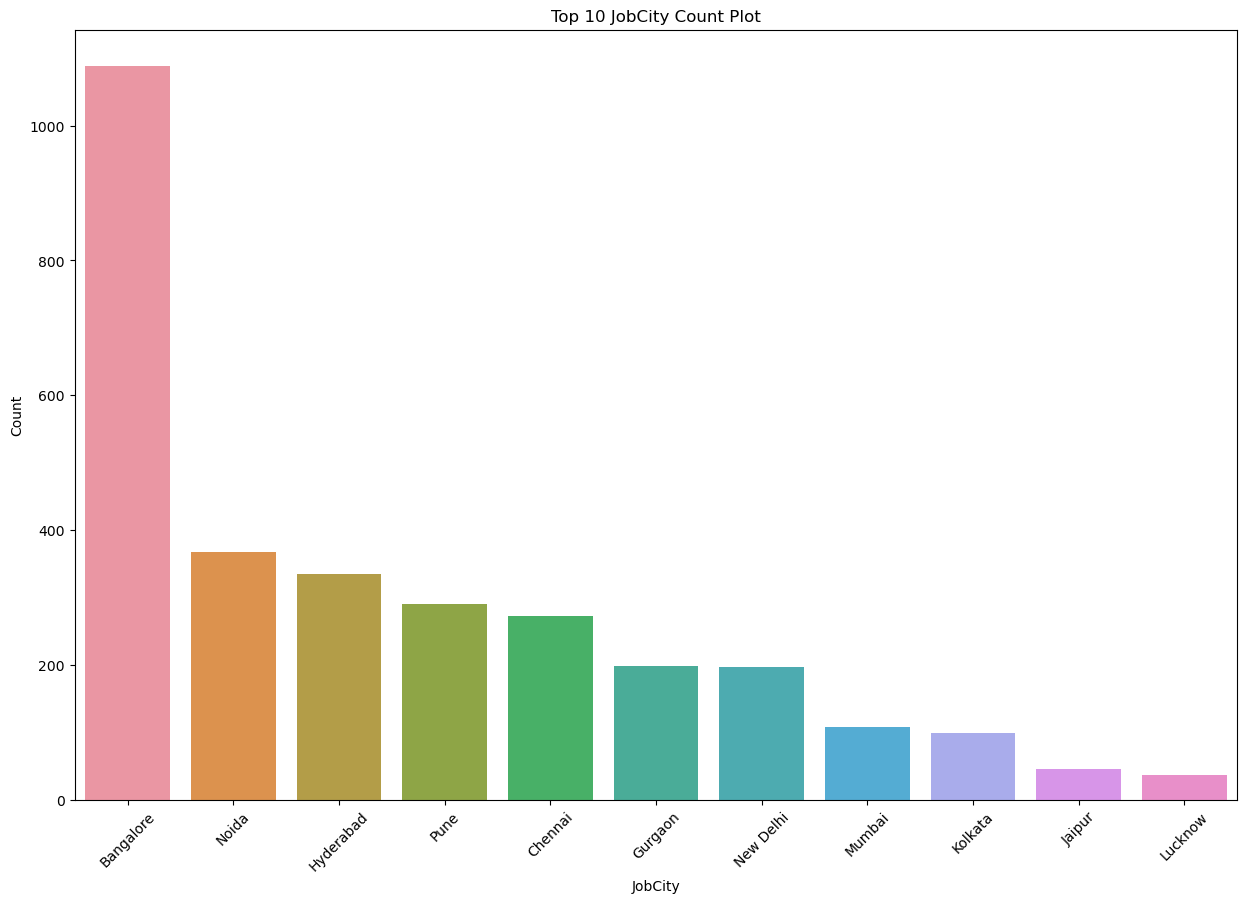

In [36]:
column_of_interest = 'JobCity'

# Filter the dataframe to include only rows with the top 10 values
filtered_data = df[df['JobCity'].isin(top_10)]

# Plot a count plot of the top 10 values
plt.figure(figsize=(15,10))
sns.countplot(data=filtered_data, x='JobCity', order=top_10)
plt.title(f'Top 10 {column_of_interest} Count Plot')
plt.xlabel('JobCity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

## Bangalore has the highest number of employees and Lucknow is the 10th city with the high number of employees

In [37]:
# # Count plot of JobCity column with color variation and adjusted label visibility
# plt.figure(figsize=(20, 50))
# plt.xticks(rotation=90)  # Rotate x-axis labels vertically
# sns.countplot(y = df["JobCity"], palette="Set3")  # Set color palette 
# plt.xlabel("Frequency")
# plt.ylabel("Job City")
# plt.title("Frequency Distribution of Job City")
# plt.tight_layout()  # Adjust layout to improve label visibility
# plt.show()

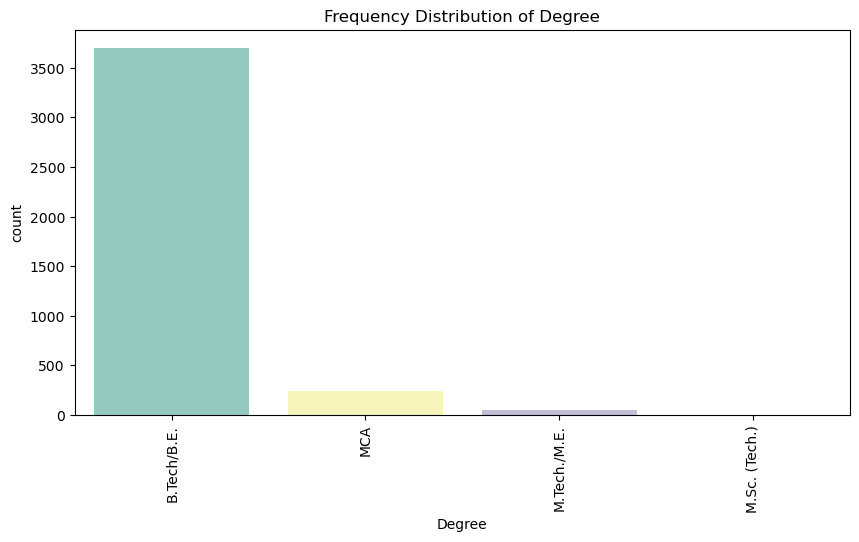

In [38]:
# Count plot of Degree column with color variation
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
sns.countplot(x = df["Degree"], palette="Set3")  # Set color palette 
plt.title("Frequency Distribution of Degree")
plt.show()

### The countplot illustrates that the majority of employees hold a degree in BTech/BE, while a few number have an MSc degree. Additionally, this plot provides insight into the distribution of various degree streams.

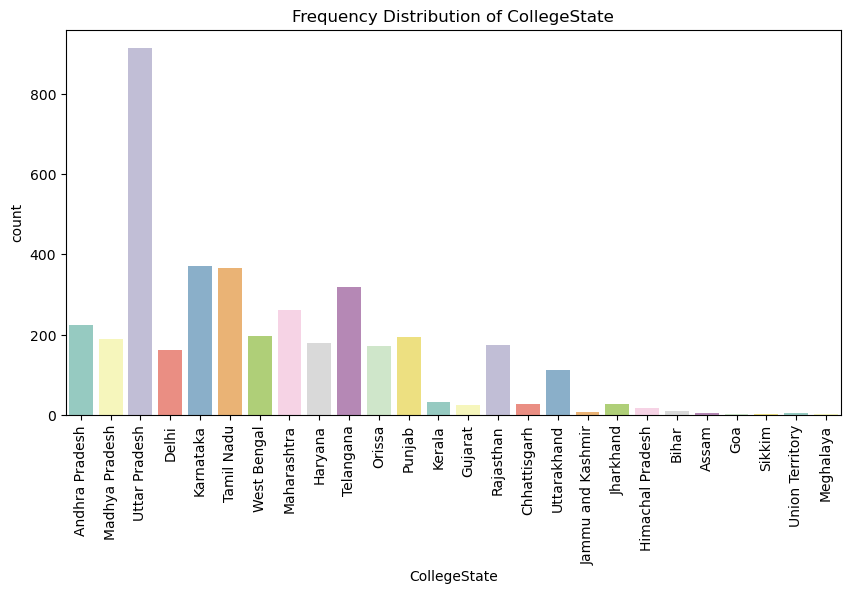

In [39]:
# Count plot of CollegeState column with color variation 
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
sns.countplot(x = df["CollegeState"], palette="Set3")  # Set color palette 
plt.title("Frequency Distribution of CollegeState")
plt.show()

### This Countplot indicates the distribution of employees based on the states where they pursued their education. It reveals that the highest number of employees are from Uttar Pradesh, while there are relatively fewer employees from Meghalaya.

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

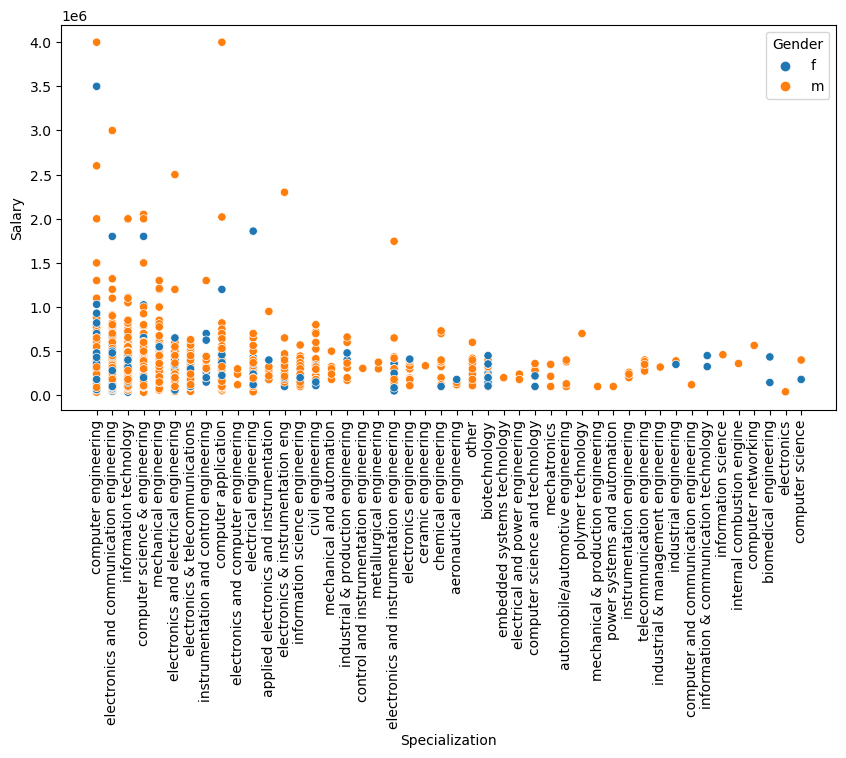

In [79]:
# Scatterplot on Specialization,Salary comparing the Gender

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90)
sns.scatterplot(x = "Specialization", y = "Salary", data = df, hue = "Gender")

#### This scatter plot visualizes the relationship between employee specialization and salary, highlighting the gender distribution among employees. It allows us to observe how salaries vary across different specializations, while also showing the proportion of male and female employees within each specialization category.

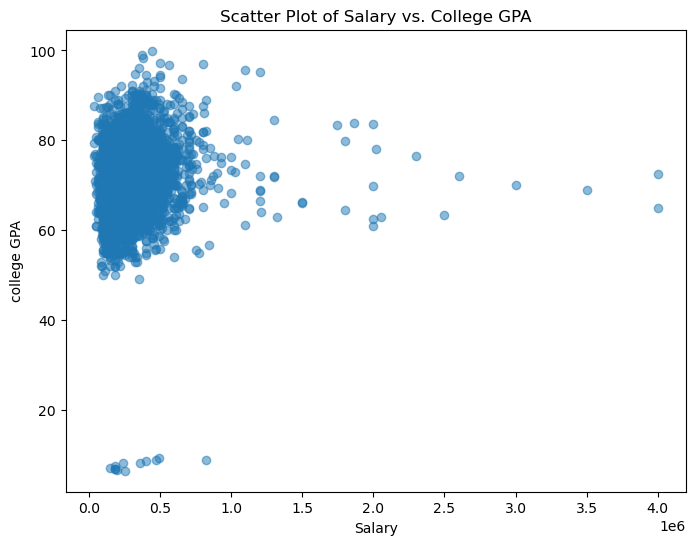

In [41]:
# Scatter plot of Salary vs. CollegeGPA
plt.figure(figsize=(8, 6))
plt.scatter(df["Salary"], df["collegeGPA"], alpha=0.5)
plt.xlabel("Salary")
plt.ylabel("college GPA")
plt.title("Scatter Plot of Salary vs. College GPA")
plt.show()

### The scatter plot shows salary versus college GPA. Clusters of dots suggest similar salaries across GPAs at lower levels, while fewer dots are scattered at higher salaries, indicating a trend of fewer individuals earning higher incomes regardless of GPA.

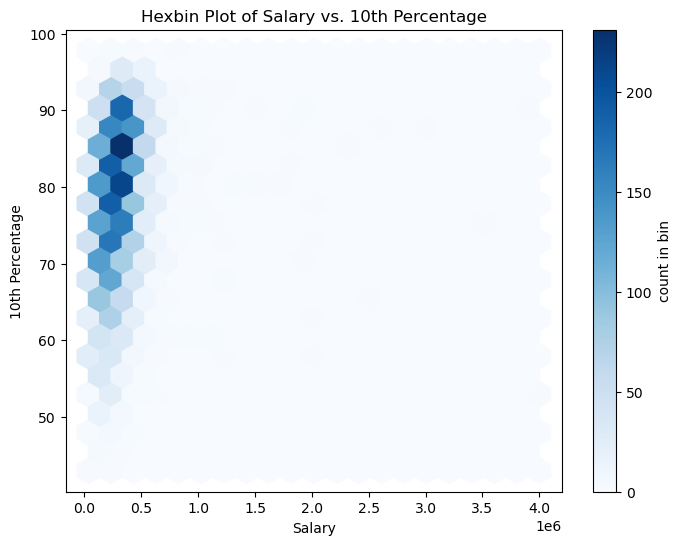

In [42]:
# Hexbin plot of Salary vs. 10percentage
plt.figure(figsize=(8, 6))
plt.hexbin(df["Salary"], df["10percentage"], gridsize=20, cmap='Blues')
plt.xlabel("Salary")
plt.ylabel("10th Percentage")
plt.title("Hexbin Plot of Salary vs. 10th Percentage")
plt.colorbar(label='count in bin')
plt.show()

### The hexbin plot illustrates the correlation between salary and 10th percentage using hexagonal bins. Darker shades of blue indicate higher counts, revealing regions where salary and 10th percentage are more densely distributed.

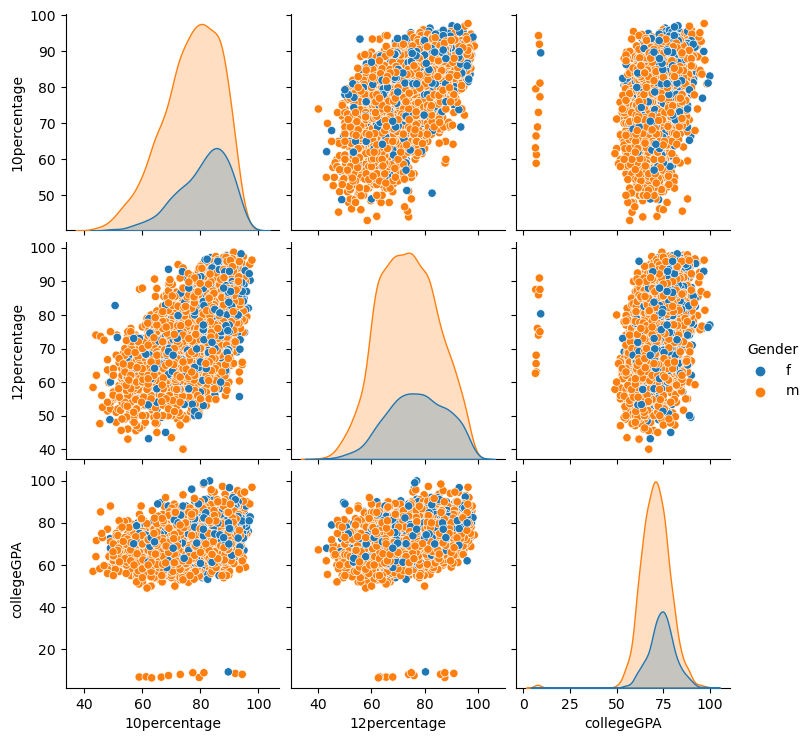

In [43]:
# Pair plot of numerical columns
sns.pairplot( df, x_vars=["10percentage", "12percentage", "collegeGPA"],
                  y_vars=["10percentage", "12percentage","collegeGPA"],
                  hue="Gender")

### This pair plot tells about all the employee's percentages and it shows the difference of male and female.

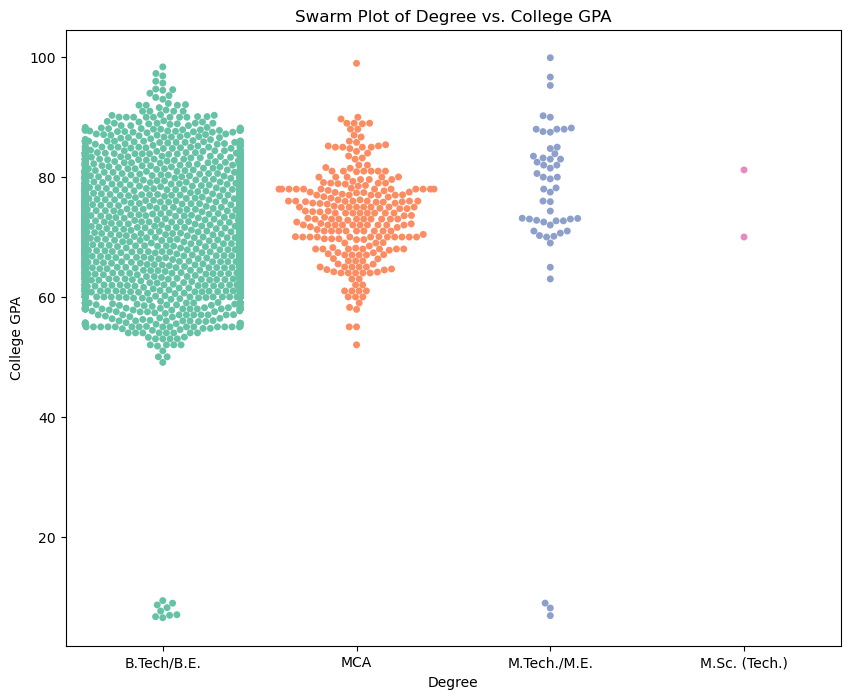

In [44]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df, x='Degree', y='collegeGPA', palette='Set2')
plt.title('Swarm Plot of Degree vs. College GPA')
plt.xlabel('Degree')
plt.ylabel('College GPA')
plt.show()

### This swarmplot tells about the Degree and collegeGPA and most of the employee's are from B.E/B.Tech

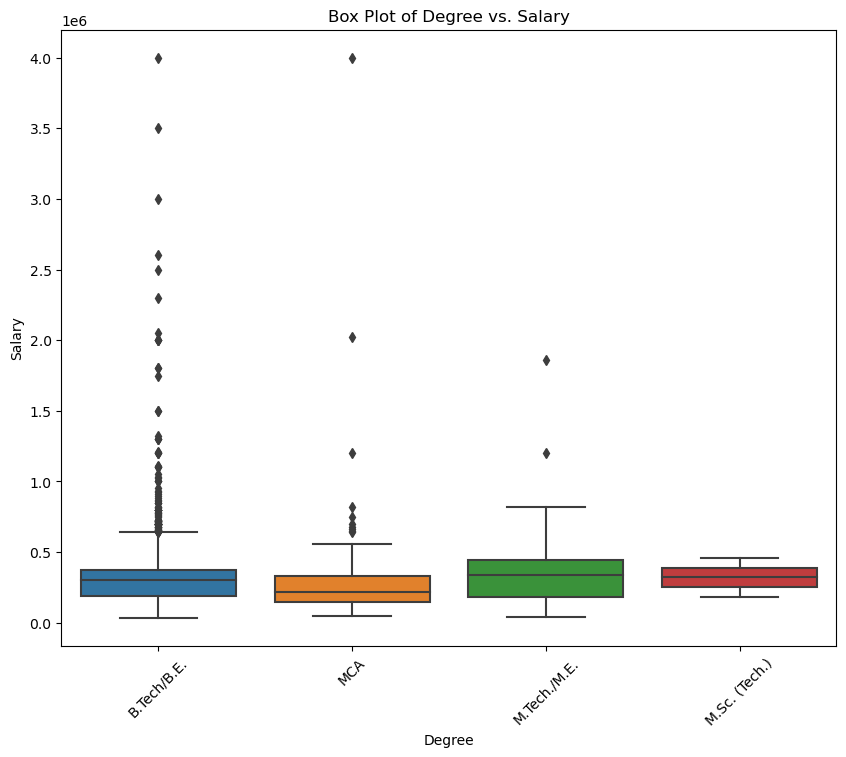

In [46]:
# Box plot of Degree vs. Salary
plt.figure(figsize=(10, 8))
sns.boxplot(x="Degree", y="Salary", data=df)
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.title("Box Plot of Degree vs. Salary")
plt.xticks(rotation=45)
plt.show()

### This Boxplot illustrates the relationship between Degree and salary. Interestingly, M.Sc(Tech) employees show no outliers, while other streams exhibit extreme outliers.

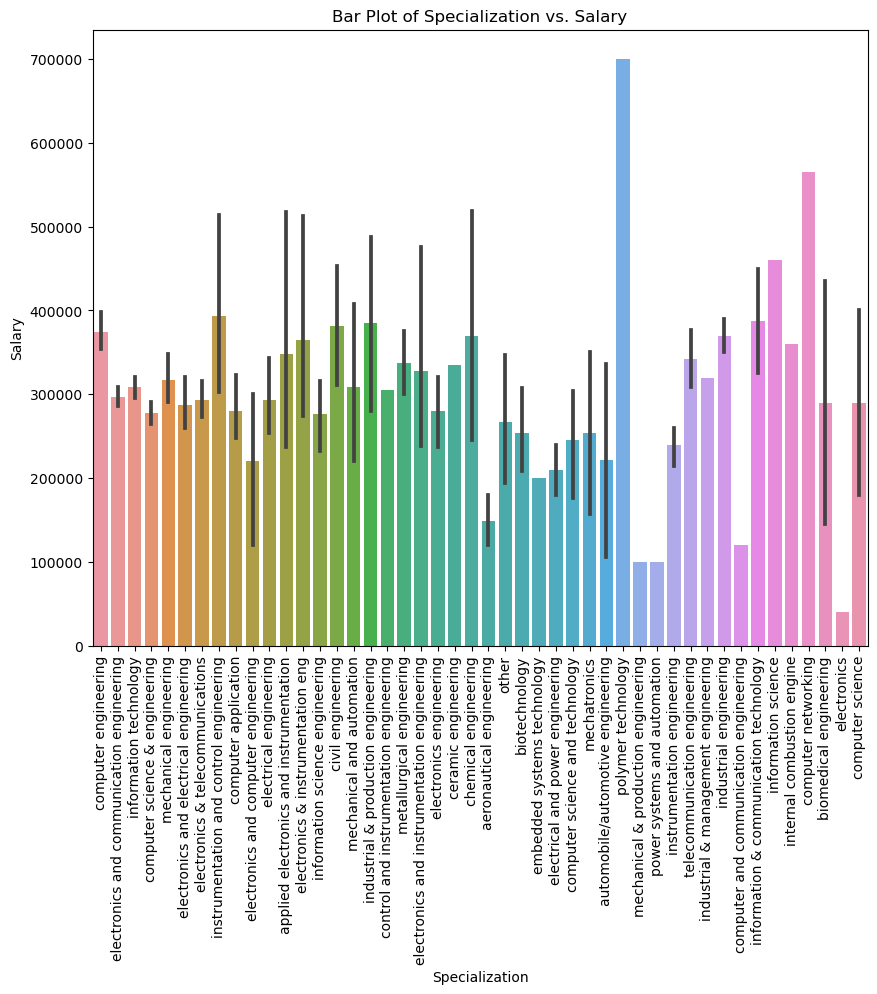

In [47]:
# Bar plot of Specialization vs. Salary
plt.figure(figsize=(10, 8))
sns.barplot(x="Specialization", y="Salary", data=df)
plt.xlabel("Specialization")
plt.ylabel("Salary")
plt.title("Bar Plot of Specialization vs. Salary")
plt.xticks(rotation=90)
plt.show()

### This barplot highlights the relationship between salary and specialization. It reveals that employees specializing in polymer technology tend to have higher salaries, whereas those in electronic specialization typically earn lower salaries.

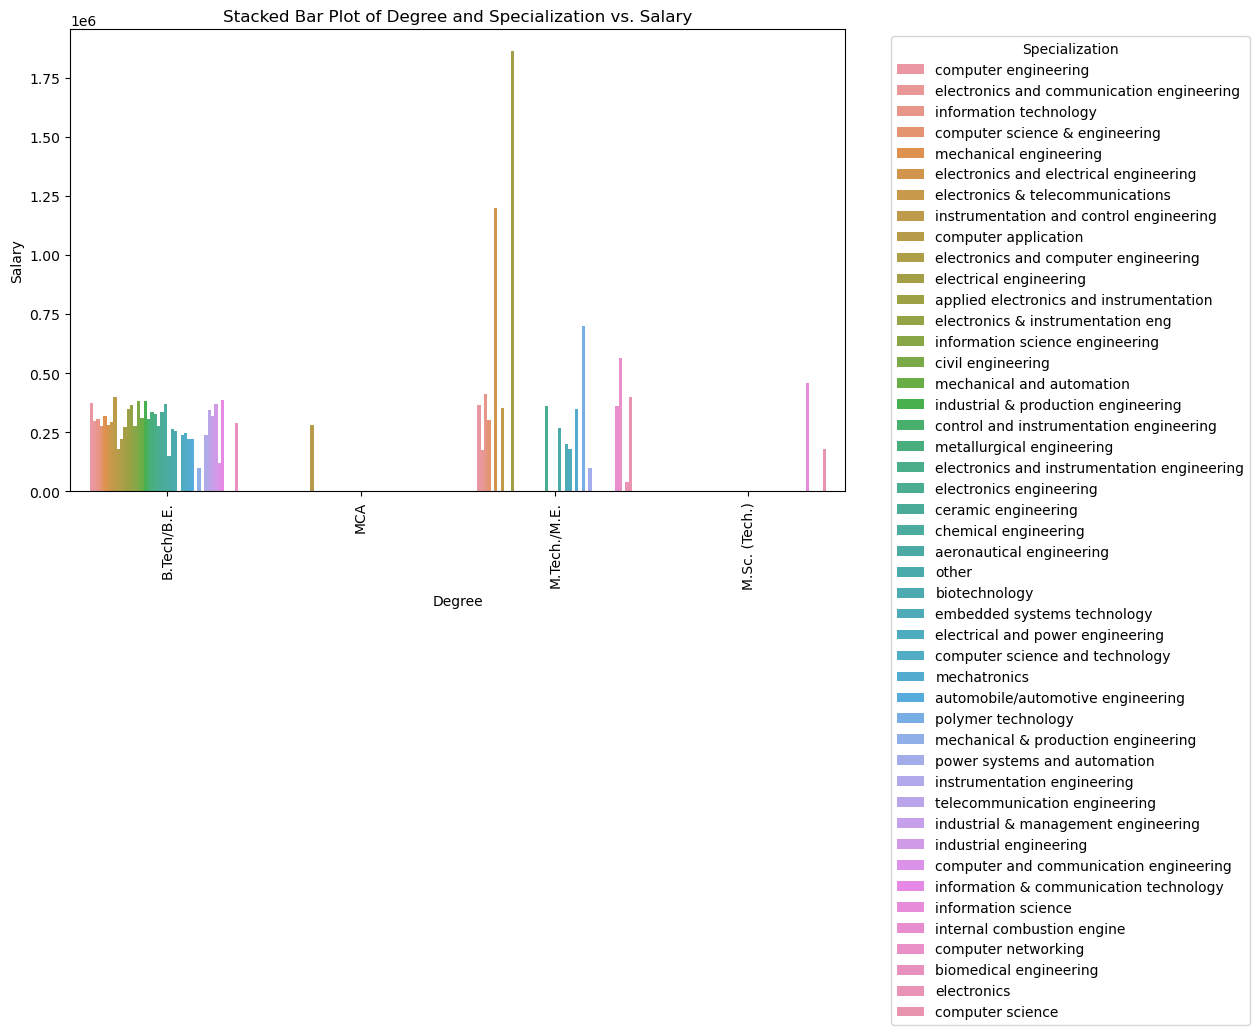

In [48]:
# Stacked bar plot of Degree and Specialization vs. Salary
plt.figure(figsize=(10, 6))
sns.barplot(x="Degree", y="Salary", hue="Specialization", data=df, ci=None)
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.title("Stacked Bar Plot of Degree and Specialization vs. Salary")
plt.xticks(rotation=90)
plt.legend(title="Specialization",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### This stacked bar plot illustrates how salary varies across different degrees and specializations. It shows that certain specializations within M.Tech/M.E tend to command higher salaries compared to others but most of the employee belongs to B.Tech/B.E. specialization

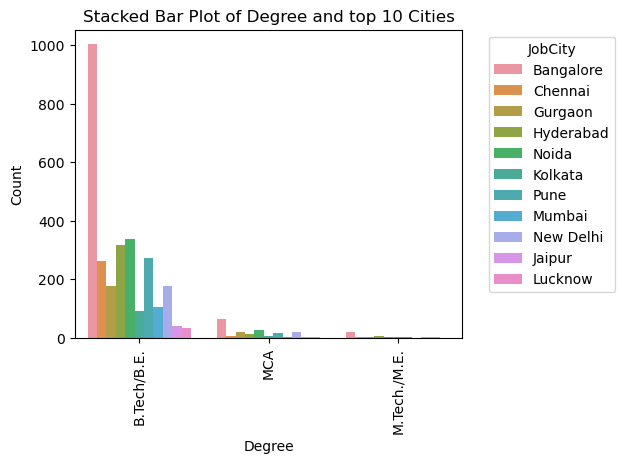

In [49]:
# Stacked bar plot of Degree and JobCity
plt.figure(figsize=(5, 4))
sns.countplot(data=filtered_data, x="Degree", hue="JobCity")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Degree and top 10 Cities")
plt.xticks(rotation=90)
plt.legend(title="JobCity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### This stacked bar plot of Degree and JobCity displays the distribution of educational qualifications across different cities. It shows that B.Tech/B.E graduates are widely spread across cities, with Bangalore having the highest count. MCA graduates are more concentrated in Pune, Bangalore, and Chennai. Other degrees like M.Tech/M.E show a less prominent presence overall. This visualization offers a quick overview of educational diversity across job markets.

# Research Questions

--------->Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

--------->Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?

In [62]:
# Import necessary libraries
import random
import statistics
from scipy.stats import t, norm

In [64]:
# Filter the DataFrame for relevant designations
data_research = df[(df["Designation"]=="programmer analyst")|(df["Designation"]=="software engineer")|(df["Designation"]=="hardware engineer")
       |(df["Designation"]=="associate engineer")]
data_research

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Year,Month,Day
4,343523,200000.0,2014-03-01,2015-03-01,software engineer,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,3,1
19,466888,325000.0,2014-09-01,2024-02-23,software engineer,Pune,f,1990-11-30,79.00,cbse,...,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,2024,2,23
20,140069,320000.0,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,...,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,2012,9,1
21,339689,200000.0,2012-08-01,2013-12-01,software engineer,Bangalore,f,1991-08-20,75.67,up,...,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,2013,12,1
24,963123,335000.0,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,2015,6,1
31,1094324,340000.0,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,2015,4,1
36,602377,270000.0,2013-03-01,2024-02-23,software engineer,Hyderabad,f,1992-08-21,91.50,state board,...,-1,-1,-1.0208,0.2124,0.4711,0.27270,-0.0943,2024,2,23
44,247617,380000.0,2012-05-01,2015-04-01,programmer analyst,Bangalore,f,1989-01-06,84.50,0,...,-1,-1,0.5100,0.6568,-0.6343,0.29730,0.1864,2015,4,1
48,338428,390000.0,2013-09-01,2024-02-23,software engineer,Bangalore,m,1991-02-28,86.60,cbse,...,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024,2024,2,23
52,794209,400000.0,2015-04-01,2024-02-23,software engineer,Navi Mumbai,m,1992-03-09,85.20,icse,...,-1,-1,1.1336,0.3789,1.0859,0.65300,0.2889,2024,2,23


In [65]:
# Extract salary data from the filtered DataFrame
salary_data = data_research["Salary"]
salary_data

4        200000.0
19       325000.0
20       320000.0
21       200000.0
24       335000.0
31       340000.0
36       270000.0
44       380000.0
48       390000.0
52       400000.0
55       250000.0
59       120000.0
60       305000.0
75       300000.0
76       800000.0
93       325000.0
96       450000.0
102      310000.0
113      340000.0
114      640000.0
115      330000.0
119      305000.0
120      500000.0
124      315000.0
125      300000.0
130      325000.0
137      340000.0
151      305000.0
163      335000.0
168      375000.0
170      235000.0
175      450000.0
182      300000.0
187      410000.0
197      240000.0
200      440000.0
204      305000.0
205      325000.0
207      360000.0
209      300000.0
214      300000.0
215      300000.0
227      550000.0
231      310000.0
233      300000.0
243      265000.0
247      275000.0
252      170000.0
257      245000.0
261      425000.0
263      300000.0
270      395000.0
275      305000.0
287      250000.0
290      560000.0
291      3

In [66]:
# Convert salary data to a list
salary_list = []
for salary in salary_data:
    salary_list.append(salary)
salary_list

[200000.0,
 325000.0,
 320000.0,
 200000.0,
 335000.0,
 340000.0,
 270000.0,
 380000.0,
 390000.0,
 400000.0,
 250000.0,
 120000.0,
 305000.0,
 300000.0,
 800000.0,
 325000.0,
 450000.0,
 310000.0,
 340000.0,
 640000.0,
 330000.0,
 305000.0,
 500000.0,
 315000.0,
 300000.0,
 325000.0,
 340000.0,
 305000.0,
 335000.0,
 375000.0,
 235000.0,
 450000.0,
 300000.0,
 410000.0,
 240000.0,
 440000.0,
 305000.0,
 325000.0,
 360000.0,
 300000.0,
 300000.0,
 300000.0,
 550000.0,
 310000.0,
 300000.0,
 265000.0,
 275000.0,
 170000.0,
 245000.0,
 425000.0,
 300000.0,
 395000.0,
 305000.0,
 250000.0,
 560000.0,
 390000.0,
 305000.0,
 315000.0,
 315000.0,
 300000.0,
 320000.0,
 785000.0,
 180000.0,
 300000.0,
 240000.0,
 315000.0,
 340000.0,
 330000.0,
 210000.0,
 380000.0,
 405000.0,
 460000.0,
 320000.0,
 275000.0,
 320000.0,
 425000.0,
 240000.0,
 180000.0,
 300000.0,
 310000.0,
 300000.0,
 475000.0,
 300000.0,
 240000.0,
 335000.0,
 335000.0,
 390000.0,
 310000.0,
 385000.0,
 300000.0,
 385000.0,

In [67]:
# Generate a random sample of salary data
num = 40
sample = random.sample(salary_list, num)
sample

[180000.0,
 145000.0,
 450000.0,
 280000.0,
 60000.0,
 335000.0,
 100000.0,
 325000.0,
 200000.0,
 325000.0,
 375000.0,
 445000.0,
 355000.0,
 400000.0,
 240000.0,
 180000.0,
 310000.0,
 300000.0,
 150000.0,
 400000.0,
 300000.0,
 300000.0,
 300000.0,
 350000.0,
 440000.0,
 300000.0,
 300000.0,
 395000.0,
 335000.0,
 360000.0,
 315000.0,
 310000.0,
 350000.0,
 480000.0,
 320000.0,
 360000.0,
 500000.0,
 600000.0,
 320000.0,
 340000.0]

In [68]:
# Calculate sample statistics
sample_mean = np.mean(sample)
sample_std = statistics.stdev(sample)
pop_mean = 300000
sample_size = len(sample)

In [69]:
print(sample_mean)
print(sample_std)
print(pop_mean)
print(sample_size)

320750.0
107611.30195147863
300000
40


In [70]:
# Calculate the t-score
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size ** 0.5)
    return numerator / denominator

t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
t_value

1.2195236050220888

In [71]:
# Set the confidence level
confidence_level = 0.95
alpha = 1 - confidence_level
print(alpha)
# Calculate the critical t-value
t_critical = t.ppf(1 - alpha / 2, df = sample_size - 1)
print(t_critical)

0.050000000000000044
2.022690911734728


Text(320750.0, 0.7, 'x_bar')

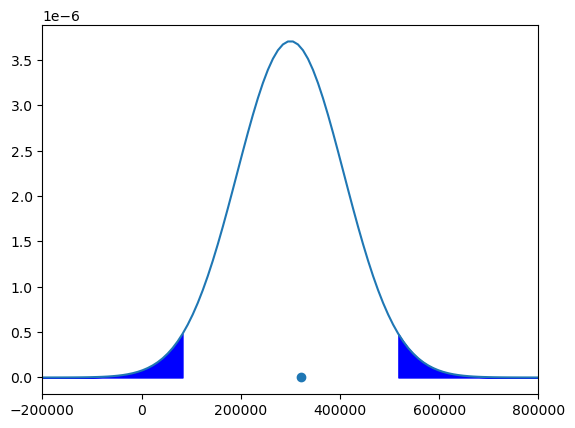

In [72]:
# Plot the normal distribution and critical regions
x_min = -200000
x_max = 800000
mean = pop_mean
std = sample_std 
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = mean + (-t_critical * std)
t_critical_right = mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='blue')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='blue')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [73]:

# Compare t-value with critical t-value and p-value
if t_value < t_critical:
    print("Reject Null Hypothesis")
else:
    print("Do not reject the Null Hypothesis.")

Reject Null Hypothesis


In [74]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))
print("p_value = ", p_value)

if p_value > alpha:
    print("Reject Null Hypothesis")
else:
    print("Do not reject the Null Hypothesis.")

p_value =  0.22264552219725164
Reject Null Hypothesis


### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?

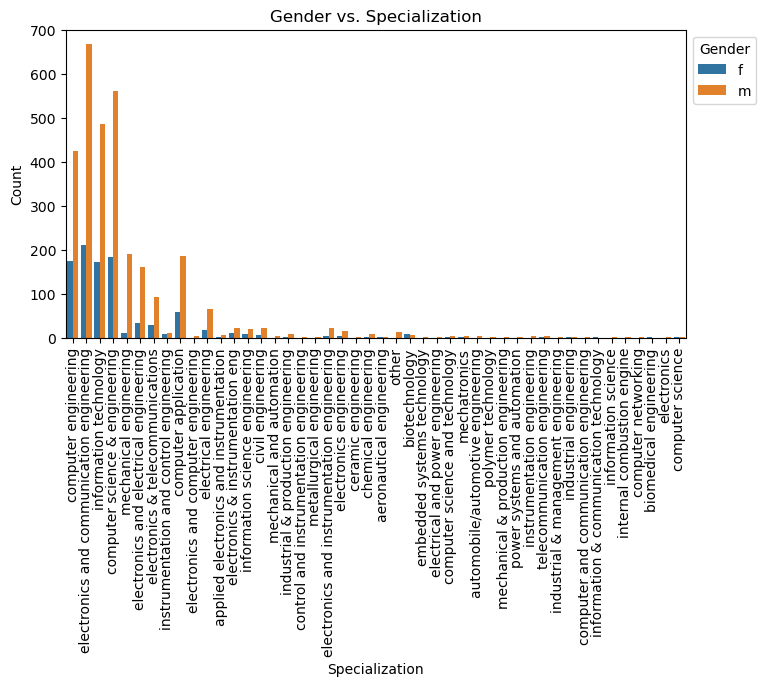

In [78]:
# Stacked bar plot of Gender and Specialization
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Specialization', hue='Gender')
plt.title('Gender vs. Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender',bbox_to_anchor=(1,1))
plt.show()

#### In our case, the observation that there are more males than females in electronic and communication engineering suggests a relationship between gender and specialization. This implies that males tend to choose electronic and communication engineering more often than females do. Conversely, other specializations, such as biotechnology, show a higher count of females compared to males.